<a href="https://colab.research.google.com/github/Gowtham-M-R/Earth_leakage/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/milknew.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data=pd.read_csv('/content/milknew.csv')
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
data.shape

(1059, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pH,1059.0,6.630123,1.399679,3.0,6.5,6.7,6.8,9.5
Temprature,1059.0,44.226629,10.098364,34.0,38.0,41.0,45.0,90.0
Taste,1059.0,0.546742,0.498046,0.0,0.0,1.0,1.0,1.0
Odor,1059.0,0.432483,0.495655,0.0,0.0,0.0,1.0,1.0
Fat,1059.0,0.671388,0.469930,0.0,0.0,1.0,1.0,1.0
Turbidity,1059.0,0.491029,0.500156,0.0,0.0,0.0,1.0,1.0
Colour,1059.0,251.840415,4.307424,240.0,250.0,255.0,255.0,255.0


In [ ]:
data['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [ ]:
data.isnull().sum()

,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


<Axes: >

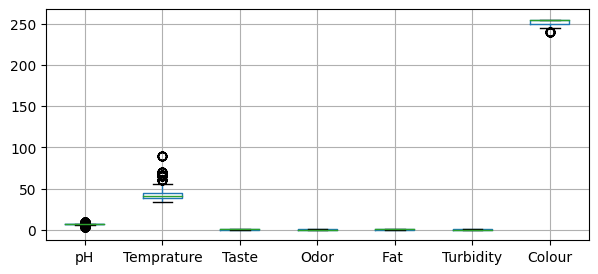

In [ ]:
plt.figure(figsize=(7,3))
data.boxplot()

In [ ]:
# Calculate skewness only for numerical columns.
# Exclude columns with non-numeric data types.
numerical_data = data.select_dtypes(include=['number'])
skewness = numerical_data.skew()

print(skewness)

pH           -0.683904
Temprature    2.216739
Taste        -0.188058
Odor          0.272949
Fat          -0.730799
Turbidity     0.035940
Colour       -1.024902
dtype: float64


In [ ]:
quantile1=data["Temprature"].quantile(0.25)
quantile2=data["Temprature"].quantile(0.75)

data["Temprature"]=np.where(data["Temprature"]<quantile1,quantile1,data["Temprature"])
data["Temprature"]=np.where(data["Temprature"]>quantile2,quantile2,data["Temprature"])

In [ ]:
t = round(data['Temprature'].skew(),10)
print(t)

0.0129903439


In [ ]:
quantile1=data["Colour"].quantile(0.25)
quantile2=data["Colour"].quantile(0.75)

data["Colour"]=np.where(data["Colour"]<quantile1,quantile1,data["Colour"])
data["Colour"]=np.where(data["Colour"]>quantile2,quantile2,data["Colour"])

In [ ]:
c = round(data['Colour'].skew(),10)
print(c)

-0.4402211375


In [ ]:
quantile1=data["pH"].quantile(0.25)
quantile2=data["pH"].quantile(0.75)

data["pH"]=np.where(data["pH"]<quantile1,quantile1,data["pH"])
data["pH"]=np.where(data["pH"]>quantile2,quantile2,data["pH"])

In [ ]:
ph = round(data['pH'].skew(),10)
print(ph)

-0.1071831836


<Axes: xlabel='Grade', ylabel='Count'>

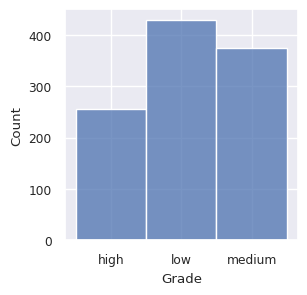

In [ ]:
plt.figure(figsize=(3,3))
sns.set(font_scale=0.8)
sns.histplot(data=data, x='Grade')

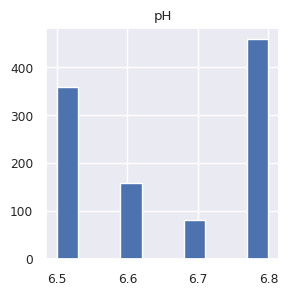

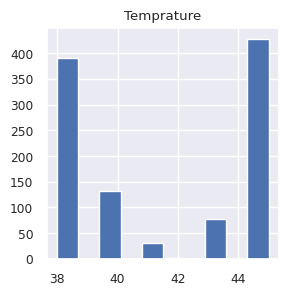

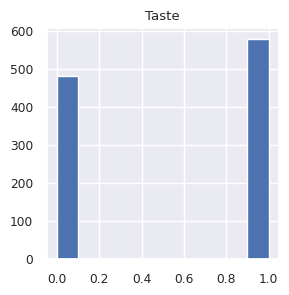

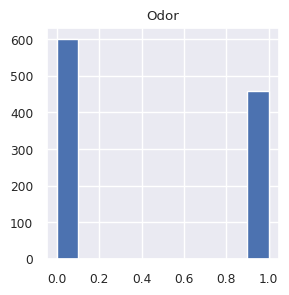

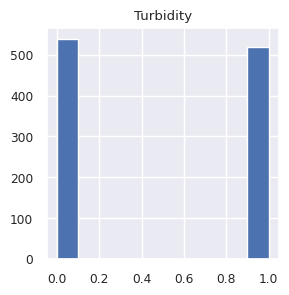

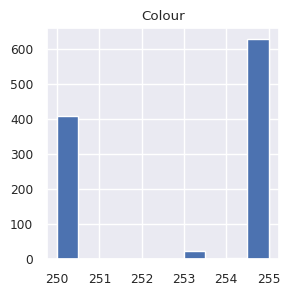

In [ ]:
column=['pH','Temprature','Taste','Odor','Turbidity','Colour']
for category in column:
    plt.figure(figsize=(3,3))
    plt.hist(data[category])
    plt.title(category)
    plt.show()

In [ ]:
# Convert 'Grade' column to numerical representation before calculating correlation
grade_mapping = {'low': 0, 'medium': 1, 'high': 2}  # Define a mapping for your grades
data['Grade'] = data['Grade'].map(grade_mapping)  # Apply the mapping to the 'Grade' column

# Now you can calculate the correlation
correlation = data.corr()
correlation


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,1.000000,0.449949,-0.041844,0.099582,0.025048,0.106425,-0.149502,0.062591
Temprature,0.449949,1.000000,-0.137448,0.205074,0.066164,0.295024,-0.352096,-0.256239
Taste,-0.041844,-0.137448,1.000000,0.017582,0.324149,0.055755,-0.114639,0.025500
Odor,0.099582,0.205074,0.017582,1.000000,0.314505,0.457935,-0.005736,0.149626
Fat,0.025048,0.066164,0.324149,0.314505,1.000000,0.329264,0.034812,0.151002
Turbidity,0.106425,0.295024,0.055755,0.457935,0.329264,1.000000,0.020945,-0.153634
Colour,-0.149502,-0.352096,-0.114639,-0.005736,0.034812,0.020945,1.000000,-0.000302
Grade,0.062591,-0.256239,0.025500,0.149626,0.151002,-0.153634,-0.000302,1.000000


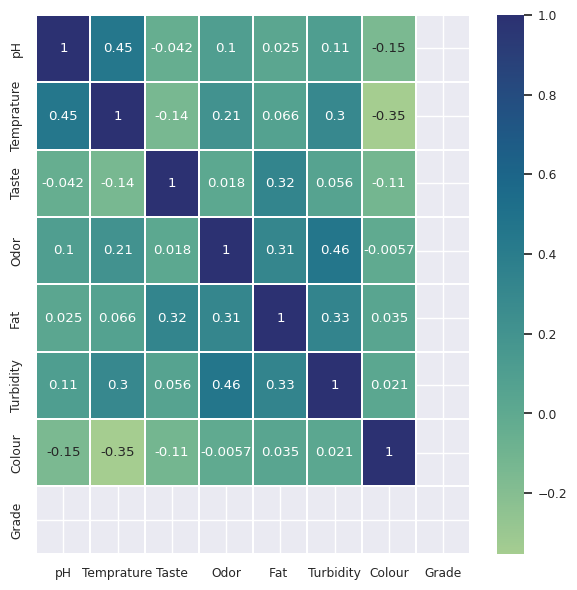

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation,annot=True,cmap='crest',linewidths=0.2)
plt.show()

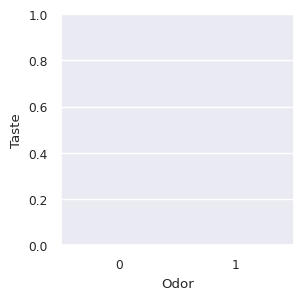

In [ ]:
plt.figure(figsize=(3,3))
sns.barplot(x='Odor',y='Taste',hue='Grade',data=data)
plt.show()

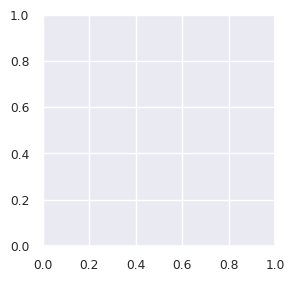

In [ ]:
plt.figure(figsize=(3,3))
sns.scatterplot(x='Turbidity',y='pH',hue='Grade',data=data)
plt.show()

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Grade']= label_encoder.fit_transform(data['Grade'])
data['Grade'].unique()

array([0])

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop(['Grade'],axis=1)
y=data['Grade']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
y_pred=model.predict(X_test)
y_pred.shape

(318,)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

1.0

In [ ]:
from sklearn.preprocessing import StandardScaler # Correct the class name to StandardScaler
standardscalar = StandardScaler()
X_train = standardscalar.fit_transform(X_train)
X_test = standardscalar.transform(X_test) # Correct the variable to X_test

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC

# ... (your previous code) ...

# Check the unique classes in y_train
unique_classes = pd.unique(y_train)
print("Unique classes in y_train:", unique_classes)

# If there's only one unique class:
if len(unique_classes) <= 1:
    print("Error: y_train has only one class. Check your data preparation.")
    # ... (Investigate and fix the data loading/preprocessing) ...
else:
    # Proceed with model training
    classifier = SVC(kernel='linear', random_state=0)
    classifier.fit(X_train, y_train)

Unique classes in y_train: [0]
Error: y_train has only one class. Check your data preparation.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler # Correct the class name to StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # Import for splitting data


# Assuming you have your data loaded in X and y
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the data
standardscalar = StandardScaler()
X_train = standardscalar.fit_transform(X_train)
X_test = standardscalar.transform(X_test) # Correct the variable to X_test


# Check the unique classes in y_train
unique_classes = pd.unique(y_train)
print("Unique classes in y_train:", unique_classes)

# If there's only one unique class:
if len(unique_classes) <= 1:
    print("Error: y_train has only one class. Check your data preparation.")
    # ... (Investigate and fix the data loading/preprocessing) ...
else:
    # Proceed with model training
    classifier = SVC(kernel='linear', random_state=0)
    classifier.fit(X_train, y_train)

    # Make predictions
    y_predict = classifier.predict(X_test)
    score = accuracy_score(y_test, y_predict)
    print(score)

Unique classes in y_train: [0]
Error: y_train has only one class. Check your data preparation.


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)
model.fit(X,y)
prediction = model.predict(X_test)
confusionmatrix = confusion_matrix(y_test,prediction)
print(confusionmatrix)

[[212]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
print(accuracy_score(y_test,prediction))

1.0


In [ ]:
import numpy as np
print(np.unique(y_train))


[0]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)


In [ ]:
print(accuracy_score(y_test,prediction))

1.0


In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=model.predict(X_test)
y_pred.shape

(212,)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

1.0